앙상블 학습: 랜덤 포레스트 (Random Forest)


**앙상블 학습(Ensemble Learning)**이란, 

하나의 모델만 사용하는 것이 아니라 여러 개의 모델을 결합하여 더 정확하고 안정적인 예측 결과를 얻는 기법입니다. 

마치 여러 전문가의 의견을 종합하여 최종 결정을 내리는 것과 같습니다.


랜덤 포레스트(Random Forest)의 개념

랜덤 포레스트는 앙상블 학습의 대표적인 예시로, 수많은(Random) 결정 트리들을 모아 숲(Forest)을 만든 모델입니다.

1. 여러 개의 결정 트리 생성: 무작위성을 부여하여 각각 조금씩 다른 예측을 하는 여러 개의 결정 트리를 만듭니다.

2. 독립적인 예측: 각 트리는 독립적으로 훈련 데이터의 일부를 사용하여 예측을 수행합니다.

3. 결과 종합: 모든 트리의 예측 결과를 모아서 최종 결론을 내립니다.

    - 분류(Classification): 가장 많은 표를 얻은 클래스를 최종 정답으로 선택합니다. (다수결 원리)

    - 회귀(Regression): 모든 트리의 예측값의 평균을 최종 예측값으로 사용합니다.


왜 랜덤 포레스트를 사용할까요?

    - 과대적합 감소: 하나의 결정 트리는 과대적합되기 쉽지만, 여러 트리의 예측을 종합하면 개별 트리의 노이즈가 상쇄되어 과대적합을 효과적으로 줄일 수 있습니다.

    - 안정적인 성능: 여러 트리가 예측하므로, 데이터의 작은 변화에도 모델의 성능이 크게 흔들리지 않아 더 안정적입니다.

--- 가지치기 없는 결정 트리 모델 정확도 ---
훈련 세트 정확도: 0.9977
테스트 세트 정확도: 0.8677


--- 가지치기 적용 결정 트리 모델 정확도 ---
훈련 세트 정확도: 0.8867
테스트 세트 정확도: 0.8542


--- 랜덤 포레스트 모델 정확도 ---
훈련 세트 정확도: 0.9975
테스트 세트 정확도: 0.8917


1. 가지치기 적용 결정 트리 모델 시각화


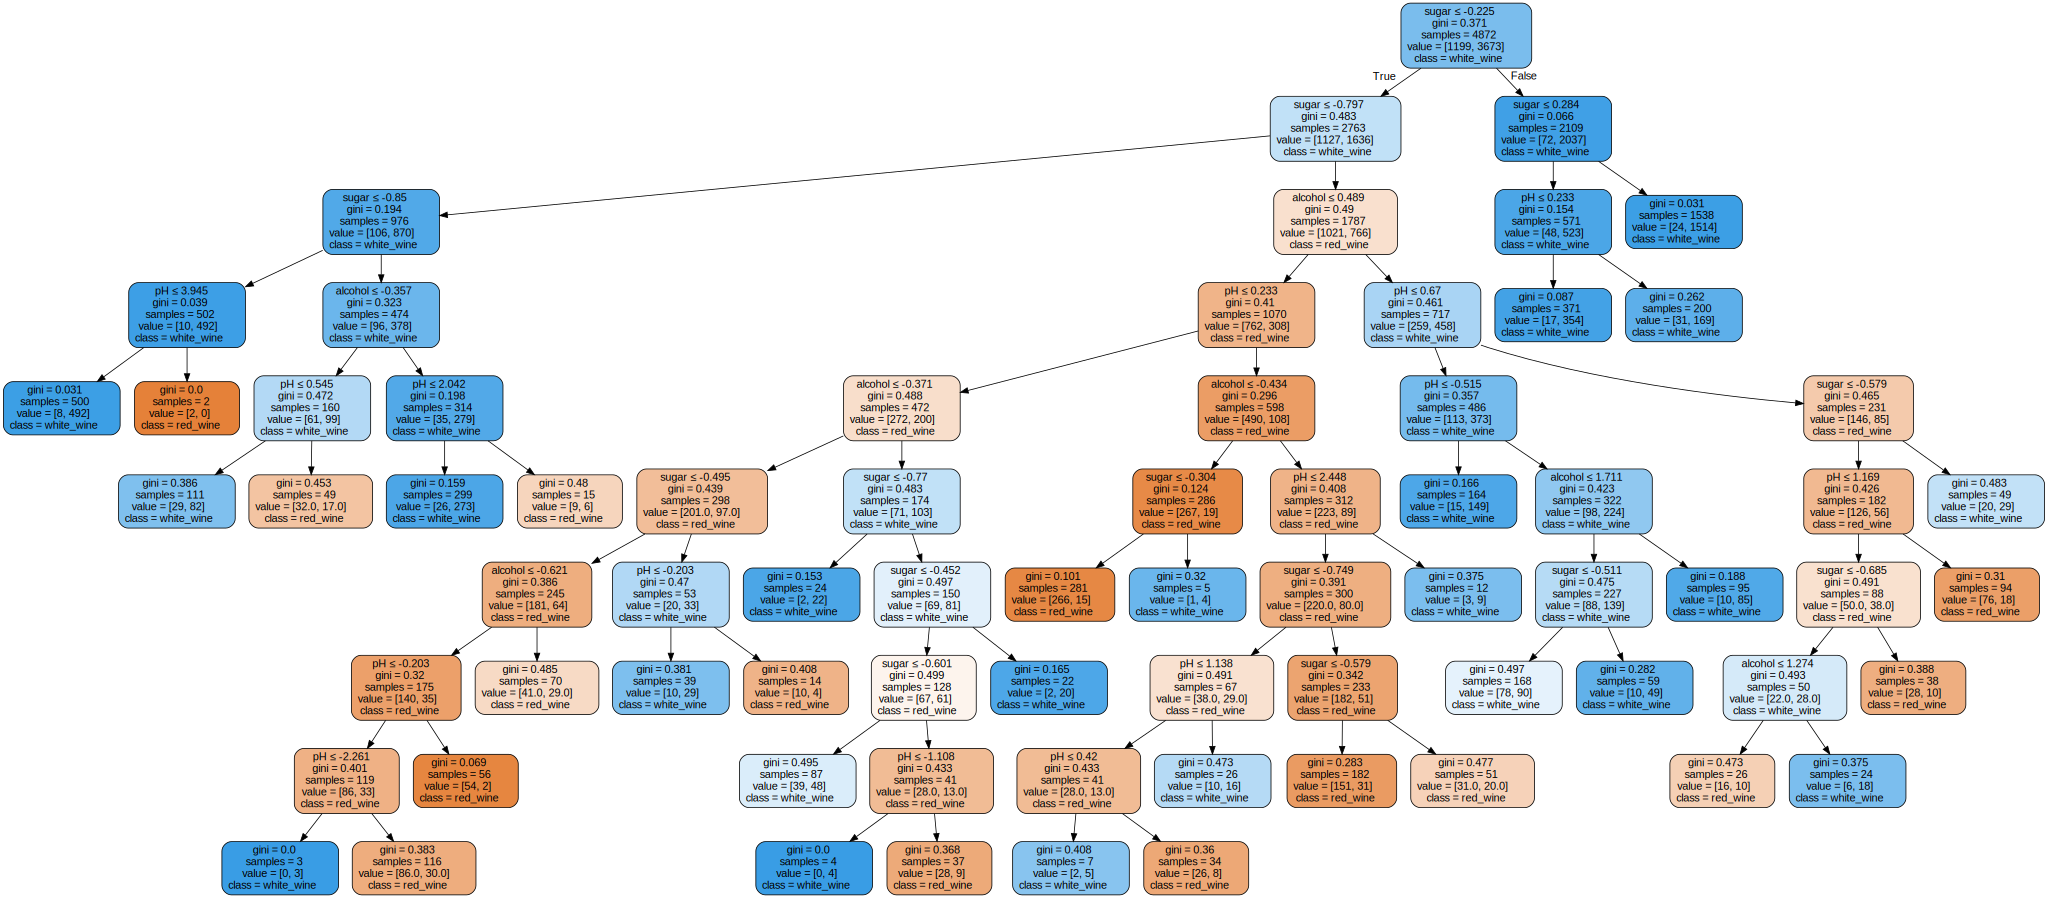

--------------------------------------------------
2. 랜덤 포레스트를 구성하는 첫 번째 나무 시각화


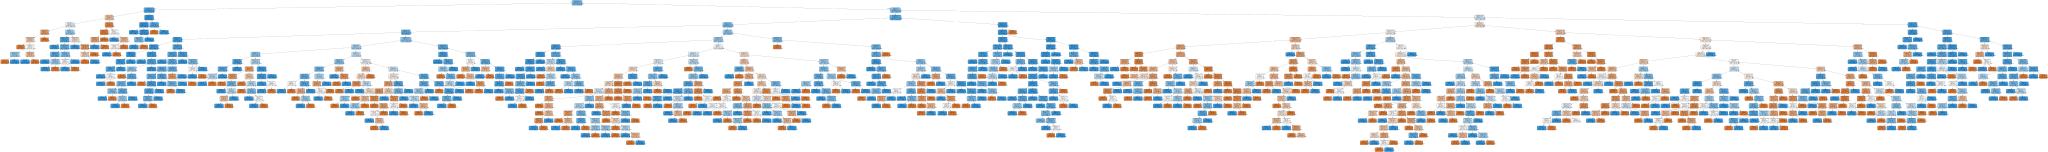

--------------------------------------------------


In [1]:
# 필요한 라이브러리를 불러옵니다.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# 랜덤 포레스트 분류기 모델을 불러옵니다.
from sklearn.ensemble import RandomForestClassifier
import graphviz # 시각화 도구인 graphviz를 임포트합니다.

# 1. 와인 데이터를 불러와 특성(X)과 타겟(y)을 분리합니다.
df = pd.read_csv("https://bit.ly/wine_csv_data")
X = df[['alcohol', 'sugar', 'pH']]
y = df['class']

# 2. 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 3. 스케일링을 적용합니다.
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# --- 가지치기 없는 결정 트리 모델 훈련 및 평가 ---
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train_scaled, y_train)

dt_train_score = dt_default.score(X_train_scaled, y_train)
dt_test_score = dt_default.score(X_test_scaled, y_test)

print("--- 가지치기 없는 결정 트리 모델 정확도 ---")
print(f"훈련 세트 정확도: {dt_train_score:.4f}")
print(f"테스트 세트 정확도: {dt_test_score:.4f}")
print("\n" + "="*50 + "\n")

# --- 가지치기 적용 결정 트리 모델 훈련 및 평가 ---
# min_impurity_decrease 값을 설정하여 가지치기를 적용합니다.
dt_pruned = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt_pruned.fit(X_train_scaled, y_train)

dt_pruned_train_score = dt_pruned.score(X_train_scaled, y_train)
dt_pruned_test_score = dt_pruned.score(X_test_scaled, y_test)

print("--- 가지치기 적용 결정 트리 모델 정확도 ---")
print(f"훈련 세트 정확도: {dt_pruned_train_score:.4f}")
print(f"테스트 세트 정확도: {dt_pruned_test_score:.4f}")
print("\n" + "="*50 + "\n")

# --- 랜덤 포레스트 모델 훈련 및 평가 ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

rf_train_score = rf.score(X_train_scaled, y_train)
rf_test_score = rf.score(X_test_scaled, y_test)

print("--- 랜덤 포레스트 모델 정확도 ---")
print(f"훈련 세트 정확도: {rf_train_score:.4f}")
print(f"테스트 세트 정확도: {rf_test_score:.4f}")
print("\n" + "="*50 + "\n")


# ---------------------------------------------
# 시각화 코드
# ---------------------------------------------

# --- 가지치기 적용 결정 트리 시각화 ---
print("1. 가지치기 적용 결정 트리 모델 시각화")
dot_data_pruned = export_graphviz(
    dt_pruned,
    feature_names=['alcohol', 'sugar', 'pH'],
    class_names=['red_wine', 'white_wine'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph_pruned = graphviz.Source(dot_data_pruned)
display(graph_pruned) # 주피터 노트북 환경에서 그래프를 출력합니다.
print("-" * 50)

# --- 랜덤 포레스트 중 첫 번째 나무 시각화 ---
print("2. 랜덤 포레스트를 구성하는 첫 번째 나무 시각화")
# .estimators_를 사용해 랜덤 포레스트가 만든 여러 나무 중 첫 번째 나무를 선택합니다.
first_rf_tree = rf.estimators_[0]

dot_data_rf = export_graphviz(
    first_rf_tree,
    feature_names=['alcohol', 'sugar', 'pH'],
    class_names=['red_wine', 'white_wine'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph_rf = graphviz.Source(dot_data_rf)
display(graph_rf) # 주피터 노트북 환경에서 그래프를 출력합니다.
print("-" * 50)


*** 모델 성능 비교의 핵심***


모델의 성능을 평가할 때 가장 중요한 것은 **테스트 세트의 정확도**입니다. 

훈련 정확도가 높더라도 테스트 정확도가 낮으면 실제 현장에서는 쓸모가 없습니다.


1. 모델 검토의 2가지 핵심

   모델의 성능을 진단할 때는 다음 두 가지를 함께 고려해야 합니다.

    - 과대적합(Overfitting) 확인: 훈련 정확도와 테스트 정확도의 차이가 클수록 과대적합 가능성이 높습니다. 
                                모델이 훈련 데이터에 너무 익숙해져서, 새로운 데이터는 잘 맞추지 못하는 상태를 의미합니다.

    - 최종 성능 확인: 모델이 처음 보는 데이터(테스트 세트)에 대해 얼마나 잘 예측하는지, 즉 일반화 성능을 점검합니다.


2. 가장 좋은 모델 선택

**세 모델 중 테스트 정확도가 가장 높은 모델**이 가장 좋은 모델입니다.

    - 랜덤 포레스트처럼 훈련 정확도와 테스트 정확도의 차이가 크더라도, 테스트 정확도 자체가 가장 높다면 그 모델이 가장 뛰어난 성능을 가졌다고 볼 수 있습니다.

    - 이는 모델이 처음 보는 데이터에 대한 예측 능력이 가장 우수하다는 것을 의미하며, 우리가 궁극적으로 원하는 일반화 성능이 가장 좋기 때문입니다.

In [ ]:
# 랜덤 포레스트 특성 중요도 확인
# 필요한 라이브러리를 불러옵니다.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 1. 와인 데이터를 불러와 특성(X)과 타겟(y)을 분리합니다.
df = pd.read_csv("https://bit.ly/wine_csv_data")
X = df[['alcohol', 'sugar', 'pH']]
y = df['class']
feature_names = ['alcohol', 'sugar', 'pH'] # 특성 이름을 리스트로 저장

# 2. 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 3. 스케일링을 적용합니다.
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# 4. 랜덤 포레스트 모델을 훈련합니다.
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# 5. 특성 중요도(Feature Importance)를 확인합니다.
# feature_importances_ 속성은 각 특성의 중요도를 나타냅니다.
importances = rf.feature_importances_

# 6. 특성 이름과 중요도를 묶어 출력합니다.
# zip() 함수를 이용해 특성 이름과 중요도 값을 짝지어줍니다.
print("--- 각 특성의 중요도 ---")
for feature, importance in zip(feature_names, importances):
    print(f"{feature:<10}: {importance:.4f}")

# 결과 해석:
# 출력된 값을 보면 'sugar'가 가장 높은 중요도를 가졌고,
# 그 다음 'alcohol', 'pH' 순서인 것을 알 수 있습니다.
# 즉, 와인의 종류를 구분하는 데 있어 당도가 가장 중요한 역할을 한다는 의미입니다.


--- 각 특성의 중요도 ---
alcohol   : 0.2309
sugar     : 0.4977
pH        : 0.2714


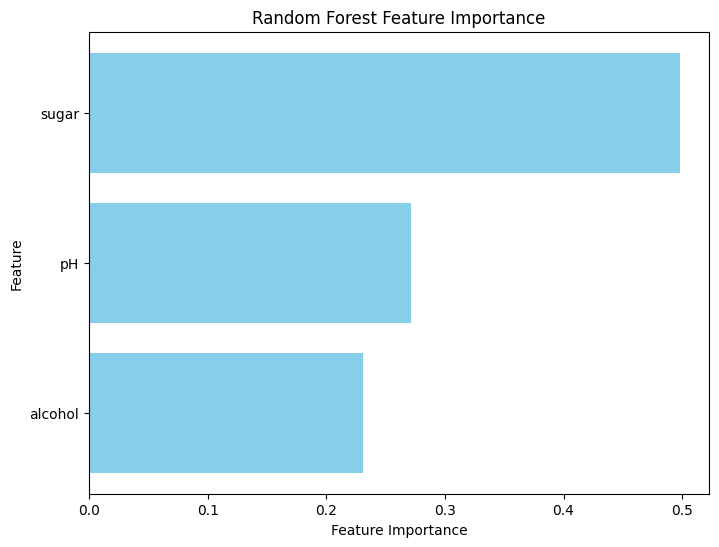

In [2]:
# 랜덤 포레스트 특성 중요도 시각화
# 필요한 라이브러리를 불러옵니다.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# 1. 와인 데이터를 불러와 특성(X)과 타겟(y)을 분리합니다.
df = pd.read_csv("https://bit.ly/wine_csv_data")
X = df[['alcohol', 'sugar', 'pH']]
y = df['class']
feature_names = ['alcohol', 'sugar', 'pH'] # 특성 이름을 리스트로 저장

# 2. 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 3. 스케일링을 적용합니다.
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# 4. 랜덤 포레스트 모델을 훈련합니다.
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# 5. 특성 중요도(Feature Importance)를 확인합니다.
importances = rf.feature_importances_

# 6. 특성 이름과 중요도를 묶어 시각화합니다.
# 특성 이름과 중요도 값을 짝지어 정렬합니다.
sorted_importance = sorted(zip(importances, feature_names), reverse=True)

# 정렬된 결과를 특성 중요도와 이름으로 분리합니다.
importances_sorted = [imp for imp, name in sorted_importance]
feature_names_sorted = [name for imp, name in sorted_importance]

# 막대 그래프(bar plot)를 생성합니다.
plt.figure(figsize=(8, 6))
plt.barh(feature_names_sorted, importances_sorted, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis() # 가장 중요한 특성이 맨 위로 오도록 y축 순서를 뒤집습니다.
plt.show()


오늘의 학습 요약: 랜덤 포레스트와 특성 중요도


이번 세션에서는 앙상블 학습의 대표적인 모델인 랜덤 포레스트를 배우고, 이 모델이 예측에 사용한 특성 중요도를 분석했습니다.


1. 랜덤 포레스트의 장점

    - 높은 일반화 성능: 여러 개의 결정 트리를 종합하여 예측하므로, 단일 결정 트리보다 과대적합을 줄이고 더 안정적인 예측을 합니다.

    - 특성 중요도 제공: 어떤 특성이 예측에 가장 중요한 역할을 했는지 파악할 수 있어, 모델의 해석이 용이합니다.

2. 와인 데이터 분석 결과

    - 모델 성능: 가지치기 없는 결정 트리, 가지치기 있는 결정 트리, 그리고 랜덤 포레스트 모델 중 랜덤 포레스트가 가장 높은 테스트 정확도를 기록했습니다.

    - 특성 중요도: 와인 분류에 있어 sugar(당도)가 다른 특성(alcohol, pH)보다 가장 중요한 역할을 한다는 것을 확인했습니다.